In [1]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [2]:
import cv2
import os
import numpy as np
import seaborn as sns
data_dir = "dataset"
data_dir2 = "dataset"
data_dir3 = "dataset"
labels = ['CN60_69','MCI60_69']
labels2 = ['MCI60_69','AD60_69']
labels3 = ['CN60_69','AD60_69']
img_size = 256
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
def get_data2(data_dir2):
    data2 = [] 
    for label2 in labels2: 
        path = os.path.join(data_dir2, label2)
        class_num = labels2.index(label2)
        for img2 in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img2))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data2.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data2)
def get_data3(data_dir3):
    data3 = [] 
    for label3 in labels3: 
        path = os.path.join(data_dir3, label3)
        class_num = labels3.index(label3)
        for img3 in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img3))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data3.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data3)

<ipython-input-2-d529ab46d9e1>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)
C:\Users\LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

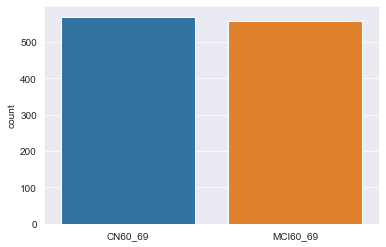

In [3]:
train = get_data(r"C:\Users\LAPTOP\OWN CODE\dataset\train")
val = get_data(r"C:\Users\LAPTOP\OWN CODE\dataset\test")
l = []
for i in train:
    if(i[1] == 0):
        l.append("CN60_69")
    if(i[1]==1):
        l.append("MCI60_69")
sns.set_style('darkgrid')
sns.countplot(l)


<ipython-input-2-d529ab46d9e1>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data2)
C:\Users\LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

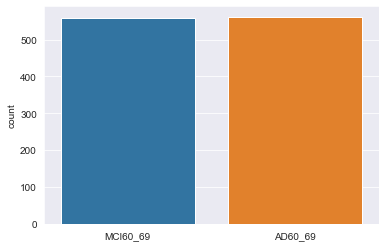

In [4]:
train2 = get_data2(r"C:\Users\LAPTOP\OWN CODE\dataset\train")
val2 = get_data2(r"C:\Users\LAPTOP\OWN CODE\dataset\test")
l2 = []
for i in train2:
    if(i[1] == 0):
        l2.append("MCI60_69")
    if(i[1]==1):
        l2.append("AD60_69")
sns.set_style('darkgrid')
sns.countplot(l2)

<ipython-input-2-d529ab46d9e1>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data3)
C:\Users\LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

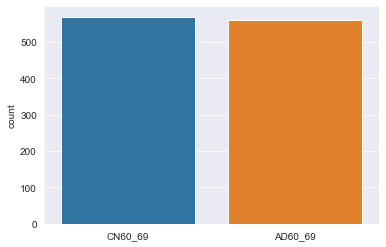

In [5]:
train3 = get_data3(r"C:\Users\LAPTOP\OWN CODE\dataset\train")
val3 = get_data3(r"C:\Users\LAPTOP\OWN CODE\dataset\test")
l3 = []
for i in train3:
    if(i[1] == 0):
        l3.append("CN60_69")
    if(i[1]==1):
        l3.append("AD60_69")
sns.set_style('darkgrid')
sns.countplot(l3)

In [6]:
x_train = []
y_train = []
x_val = []
y_valA = []

x_train2 = []
y_train2 = []
x_val2 = []
y_valB = []


x_train3 = []
y_train3 = []
x_val3 = []
y_valC = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_valA.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_valA)

for feature2, label2 in train2:
    x_train2.append(feature2)
    y_train2.append(label2)

for feature2, label2 in val2:
    x_val2.append(feature2)
    y_valB.append(label2)

# Normalize the data
x_train2 = np.array(x_train2) / 255
x_val2 = np.array(x_val2) / 255

x_train2.reshape(-1, img_size, img_size, 1)
y_train2 = np.array(y_train2)

x_val2.reshape(-1, img_size, img_size, 1)
y_val2 = np.array(y_valB)

for feature3, label3 in train3:
    x_train3.append(feature3)
    y_train3.append(label3)

for feature3, label3 in val3:
    x_val3.append(feature3)
    y_valC.append(label3)

# Normalize the data
x_train3 = np.array(x_train3) / 255
x_val3 = np.array(x_val3) / 255

x_train3.reshape(-1, img_size, img_size, 1)
y_train3 = np.array(y_train3)

x_val3.reshape(-1, img_size, img_size, 1)
y_val3 = np.array(y_valC)













In [7]:
# Building the Model Architecture
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(256,256,3)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(4000,activation="relu"))
model.add(Dense(1000,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(2, activation="sigmoid"))

In [8]:
import tensorflow as tf
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.000001),
    metrics=['accuracy']    
)
model.summary()


train_ds=tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_ds=tf.data.Dataset.from_tensor_slices((x_val,y_val))


def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(256,256))
    
    return image,label



train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)



train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 6)       456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 16)      2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 59536)             0         
_________________________________________________________________
dense (Dense)                (None, 4000)              238148000 
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              4

In [9]:
from keras.optimizers import Adam
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


In [20]:
history = model.fit(x_train,y_train,epochs = 50 , validation_data = (x_val, y_val))

Epoch 1/50
36/36 [==============================] - 240s 7s/step - loss: 0.6898 - accuracy: 0.5667 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/50
36/36 [==============================] - 211s 6s/step - loss: 0.6697 - accuracy: 0.6210 - val_loss: 0.6874 - val_accuracy: 0.5125
Epoch 3/50
36/36 [==============================] - 203s 6s/step - loss: 0.6508 - accuracy: 0.6748 - val_loss: 0.6842 - val_accuracy: 0.5375
Epoch 4/50
36/36 [==============================] - 204s 6s/step - loss: 0.6348 - accuracy: 0.6853 - val_loss: 0.6781 - val_accuracy: 0.5500
Epoch 5/50
36/36 [==============================] - 203s 6s/step - loss: 0.6282 - accuracy: 0.6768 - val_loss: 0.6711 - val_accuracy: 0.5625
Epoch 6/50
36/36 [==============================] - 206s 6s/step - loss: 0.6072 - accuracy: 0.7226 - val_loss: 0.6774 - val_accuracy: 0.5250
Epoch 7/50
36/36 [==============================] - 203s 6s/step - loss: 0.5880 - accuracy: 0.7664 - val_loss: 0.6548 - val_accuracy: 0.6375
Epoch 8/50
36

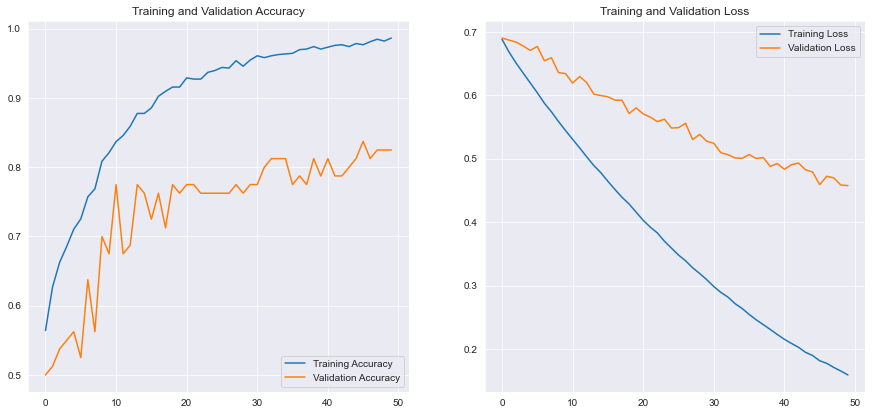

              precision    recall  f1-score   support

     CN60_69       0.93      0.70      0.80        40
    MCI60_69       0.76      0.95      0.84        40

    accuracy                           0.82        80
   macro avg       0.85      0.82      0.82        80
weighted avg       0.85      0.82      0.82        80

[[28 12]
 [ 2 38]]


<ipython-input-35-fdc099b49d65>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-35-fdc099b49d65>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


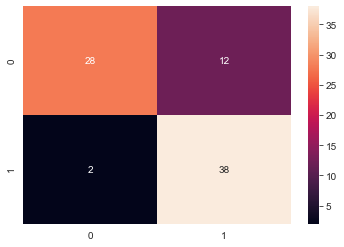

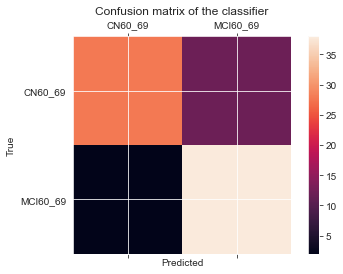

              precision    recall  f1-score   support

     CN60_69       0.93      0.70      0.80        40
     CN60_69       0.76      0.95      0.84        40

    accuracy                           0.82        80
   macro avg       0.85      0.82      0.82        80
weighted avg       0.85      0.82      0.82        80



In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

from sklearn.metrics import classification_report
predictions = model.predict_classes(x_val)
from sklearn.metrics import confusion_matrix
print(classification_report(y_valA, predictions, target_names = ['CN60_69','MCI60_69']))

cm = confusion_matrix(y_valA, predictions) 
sns.heatmap(cm, annot= True, fmt='d')

print(cm) 

fig = plt.figure() 

ax = fig.add_subplot(111) 

cax = ax.matshow(cm) 

plt.title('Confusion matrix of the classifier') 

fig.colorbar(cax) 

ax.set_xticklabels([''] + labels) 

ax.set_yticklabels([''] + labels) 

plt.xlabel('Predicted') 

plt.ylabel('True') 

plt.show()





print(classification_report(y_valA, predictions, target_names = ['CN60_69','CN60_69']))



In [10]:
history = model.fit(x_train2,y_train2,epochs = 50 , validation_data = (x_val2, y_val2))

Epoch 1/50
36/36 [==============================] - 205s 5s/step - loss: 0.6897 - accuracy: 0.5171 - val_loss: 0.6781 - val_accuracy: 0.5000
Epoch 2/50
36/36 [==============================] - 204s 6s/step - loss: 0.6639 - accuracy: 0.6225 - val_loss: 0.6666 - val_accuracy: 0.5125
Epoch 3/50
36/36 [==============================] - 203s 6s/step - loss: 0.6532 - accuracy: 0.6250 - val_loss: 0.6582 - val_accuracy: 0.5000
Epoch 4/50
36/36 [==============================] - 199s 6s/step - loss: 0.6395 - accuracy: 0.6443 - val_loss: 0.6495 - val_accuracy: 0.5750
Epoch 5/50
36/36 [==============================] - 195s 5s/step - loss: 0.6265 - accuracy: 0.6713 - val_loss: 0.6419 - val_accuracy: 0.6000
Epoch 6/50
36/36 [==============================] - 203s 6s/step - loss: 0.6150 - accuracy: 0.6668 - val_loss: 0.6376 - val_accuracy: 0.5875
Epoch 7/50
36/36 [==============================] - 194s 5s/step - loss: 0.6106 - accuracy: 0.6819 - val_loss: 0.6261 - val_accuracy: 0.6125
Epoch 8/50
36

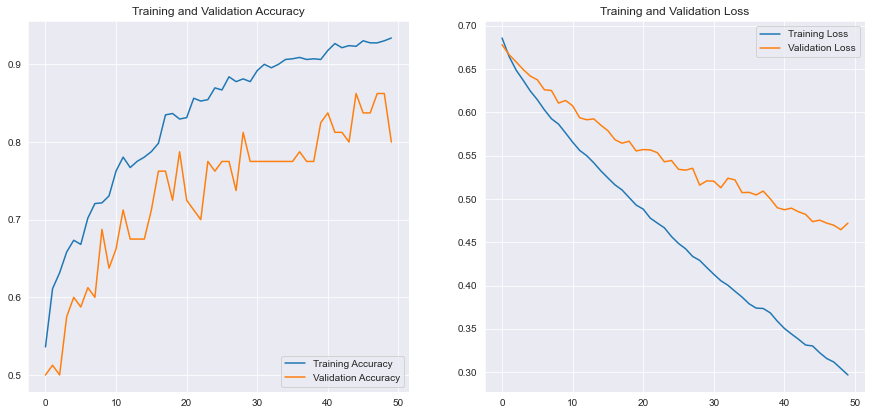

              precision    recall  f1-score   support

    MCI60_69       0.74      0.93      0.82        40
     AD60_69       0.90      0.68      0.77        40

    accuracy                           0.80        80
   macro avg       0.82      0.80      0.80        80
weighted avg       0.82      0.80      0.80        80

[[37  3]
 [13 27]]


<ipython-input-13-35b18955db9d>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([''] + labels)
<ipython-input-13-35b18955db9d>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([''] + labels)


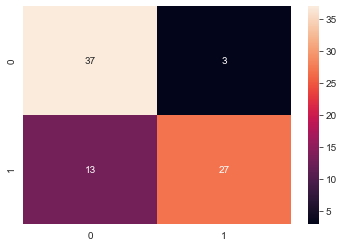

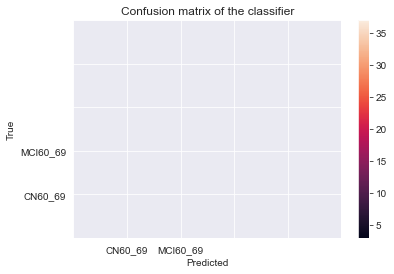

              precision    recall  f1-score   support

    MCI60_69       0.74      0.93      0.82        40
     AD60_69       0.90      0.68      0.77        40

    accuracy                           0.80        80
   macro avg       0.82      0.80      0.80        80
weighted avg       0.82      0.80      0.80        80



In [13]:
import matplotlib.pyplot as plt
acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

from sklearn.metrics import classification_report
predictions2 = model.predict_classes(x_val2)
from sklearn.metrics import confusion_matrix
print(classification_report(y_valB, predictions2, target_names = ['MCI60_69','AD60_69']))

cm2 = confusion_matrix(y_valB, predictions2) 
sns.heatmap(cm2, annot= True, fmt='d')

print(cm2) 

fig2 = plt.figure() 

ax2 = fig2.add_subplot(111) 

cax2 = ax.matshow(cm2) 

plt.title('Confusion matrix of the classifier') 

fig2.colorbar(cax2) 

ax2.set_xticklabels([''] + labels) 

ax2.set_yticklabels([''] + labels) 

plt.xlabel('Predicted') 

plt.ylabel('True') 

plt.show()





print(classification_report(y_valB, predictions2, target_names = ['MCI60_69','AD60_69']))

In [14]:
history = model.fit(x_train3,y_train3,epochs = 50 , validation_data = (x_val3, y_val3))

Epoch 1/50
36/36 [==============================] - 200s 6s/step - loss: 0.5668 - accuracy: 0.7235 - val_loss: 0.5527 - val_accuracy: 0.7625
Epoch 2/50
36/36 [==============================] - 200s 6s/step - loss: 0.5152 - accuracy: 0.7915 - val_loss: 0.5577 - val_accuracy: 0.7375
Epoch 3/50
36/36 [==============================] - 200s 6s/step - loss: 0.4899 - accuracy: 0.8154 - val_loss: 0.5733 - val_accuracy: 0.6750
Epoch 4/50
36/36 [==============================] - 204s 6s/step - loss: 0.4719 - accuracy: 0.8392 - val_loss: 0.5527 - val_accuracy: 0.7250
Epoch 5/50
36/36 [==============================] - 201s 6s/step - loss: 0.4543 - accuracy: 0.8489 - val_loss: 0.5460 - val_accuracy: 0.7500
Epoch 6/50
36/36 [==============================] - 200s 6s/step - loss: 0.4373 - accuracy: 0.8640 - val_loss: 0.5402 - val_accuracy: 0.7500
Epoch 7/50
36/36 [==============================] - 200s 6s/step - loss: 0.4249 - accuracy: 0.8728 - val_loss: 0.5439 - val_accuracy: 0.7250
Epoch 8/50
36

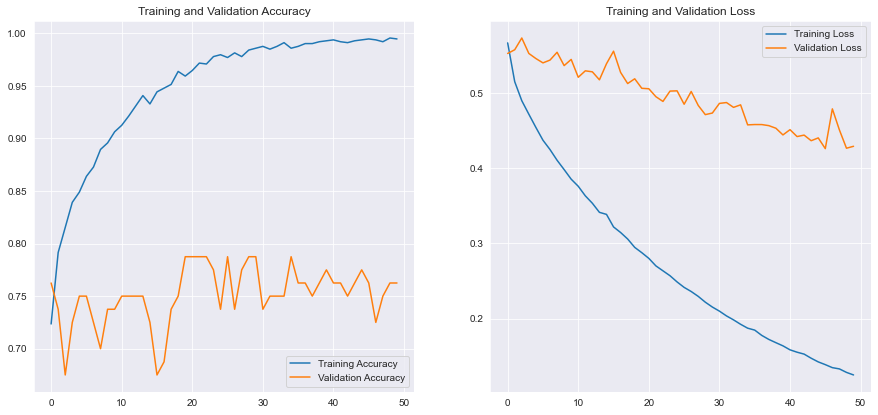

              precision    recall  f1-score   support

     CN60_69       0.71      0.88      0.79        40
     AD60_69       0.84      0.65      0.73        40

    accuracy                           0.76        80
   macro avg       0.78      0.76      0.76        80
weighted avg       0.78      0.76      0.76        80



<AxesSubplot:>

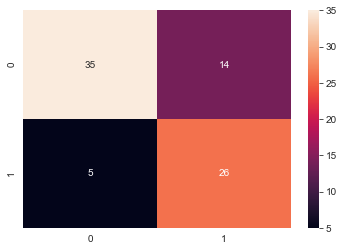

In [15]:
import matplotlib.pyplot as plt
acc3 = history.history['accuracy']
val_acc3 = history.history['val_accuracy']
loss3 = history.history['loss']
val_loss3 = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc3, label='Training Accuracy')
plt.plot(epochs_range, val_acc3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss3, label='Training Loss')
plt.plot(epochs_range, val_loss3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

from sklearn.metrics import classification_report
predictions3 = model.predict_classes(x_val3)

print(classification_report(y_valC, predictions3, target_names = ['CN60_69','AD60_69']))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions3, y_valC)
sns.heatmap(cm, annot= True, fmt='d')
